In [125]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

### Preparando dados

In [142]:
DATA_PATH = "./data"
# FILE_NAME = "crimes.csv"
FILE_NAME = "NYPD_Arrests_Data__Historic__20240623.csv"

In [147]:
df = pd.read_csv(f"{DATA_PATH}/{FILE_NAME}")
df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,220756993,11/19/2020,155.0,RAPE 2,104.0,RAPE,PL 1303001,F,B,41,0.0,18-24,M,BLACK,1013232.0,236725.0,40.816392,-73.895296,POINT (-73.89529641399997 40.816391847000034)
1,221995093,12/18/2020,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,K,84,0.0,45-64,M,WHITE,989013.0,192652.0,40.695469,-73.982825,POINT (-73.98282507899995 40.69546894100006)
2,221558560,12/09/2020,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,S,120,0.0,<18,M,BLACK,962748.0,174174.0,40.644726,-74.077483,POINT (-74.07748315899995 40.64472613100002)
3,217890363,09/15/2020,NaN,NaN,NaN,NaN,PL 2650022,M,B,44,0.0,25-44,M,BLACK,1009412.0,245306.0,40.839956,-73.909065,POINT (-73.90906496999997 40.83995593800007)
4,219517698,10/21/2020,153.0,RAPE 3,104.0,RAPE,PL 1302502,F,Q,112,0.0,25-44,M,WHITE HISPANIC,1025420.0,202485.0,40.722364,-73.851474,POINT (-73.85147389399998 40.72236368700004)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5725517,59094011,02/25/2009,490.0,"STOLEN PROPERTY 3,POSSESSION",232.0,POSSESSION OF STOLEN PROPERTY 5,PL 1654000,M,Q,110,0.0,18-24,M,WHITE HISPANIC,1019751.0,206764.0,40.734133,-73.871903,POINT (-73.87190313999997 40.73413305400004)
5725518,57260078,02/13/2009,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,K,79,0.0,45-64,M,BLACK,998273.0,193029.0,40.696494,-73.949431,POINT (-73.94943081499997 40.69649389200004)
5725519,58924345,02/19/2009,397.0,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105.0,ROBBERY,PL 1601504,F,B,44,0.0,<18,M,BLACK,1006032.0,243764.0,40.835733,-73.921285,POINT (-73.92128542599994 40.83573258000007)
5725520,59093573,02/25/2009,779.0,"PUBLIC ADMINISTRATION,UNCLASSIFIED FELONY",126.0,MISCELLANEOUS PENAL LAW,PL 215510B,F,M,30,0.0,25-44,F,WHITE,999110.0,239415.0,40.823810,-73.946310,POINT (-73.946309849 40.82381017900008)


#### TESTIZIN NE PAE

In [129]:
# df["round_log"]  = np.round(df["longitude"], 3)
# df["round_lat"]  = np.round(df["latitude"], 3)
# lat_tuples =  df[["round_log", "round_lat"]].apply(lambda row: (row["round_log"], row["round_lat"]), axis=1)
# uniques = np.unique(lat_tuples)

In [130]:
# with open("aaa", 'w') as f:
#     for unique in uniques:
#         f.write(f"{unique[0]}, {unique[1]}\n")

In [131]:
# import json
# import requests

# NEIGH_PATH = "./data/neighbourhood"
# BATCH_SIZE = 200
# START_FROM = 0
# FILE_NAME = f"{START_FROM}-{START_FROM+BATCH_SIZE}.json"

# def get_neighborhood_osm(lat, lng):
#     url = f"https://nominatim.openstreetmap.org/reverse?format=jsonv2&lat={lat}&lon={lng}"
#     response = requests.get(url)
#     if response.status_code == 200:
#         data = response.json()
#         if 'address' in data:
#             result_obj = {}
#             if "neighbourhood" in data["address"]:
#                 result_obj["neighbourhood"] = data["address"]["neighbourhood"]
#             if "suburb" in data["address"]:
#                 result_obj["suburb"] = data["address"]["suburb"]
#             if "road" in data["address"]:
#                 result_obj["road"] = data["address"]["road"]
#             return result_obj
#             # return data['address']
#     return None

# def getBatchOfAddresses():
#     addr_mapper = {}
#     for i in range(START_FROM, START_FROM + BATCH_SIZE):
#         long = uniquess[i][0]
#         lat = uniquess[i][1]
        
#         addr_mapper[f"{lat},{long}"] = get_neighborhood_osm(lat, long)

#     with open(f"{NEIGH_PATH}/{FILE_NAME}", "a") as f:
#         json.dump(addr_mapper, f)
        
    
# getBatchOfAddresses()

#### aaa

In [150]:
NOT_DESIRED = ["", "(null)", "1", "2", "2&1", "3", "4", "5", "INTENT TO", "INTENT T", "OF M", "OF MOTOR", "POLICY-", "POLICY"]
CASTING = {
    "AGGRAVATED HARASSMENT 2": "AGGRAVATED HARASSMENT 1",
    "BAIL JUMPING 1 & 2": "BAIL JUMPING 3",
    "CONSPIRACY 4": "CONSPIRACY 2",
    "CRIMINAL 3 & 2": "CRIMINAL",
    "CRIMINAL 4": "CRIMINAL",
    "CUSTODIAL INTERFERENCE 2": "CUSTODIAL INTERFERENCE 1",
    "DRUG": "DRUGS",
    "ESCAPE 3": "ESCAPE 2",
    "ETC.": "ETC",
    "ETC.-MISD.": "ETC",
    "FRAUDULENT": "FRAUD",
    "GAMBLING 1": "GAMBLING",
    "GAMBLING 2": "GAMBLING",
    "IMPERSONATION 2": "IMPERSONATION 1",
    "IMPRISONMENT 2": "IMPRISONMENT 1",
    "KIDNAPPING 2": "KIDNAPPING 1",
    "MISCHIEF 1": "MISCHIEF",
    "NYC UNCLASSIFIED WARRANT": "NYC UNCLASSIFIED",
    "OBSCENITY 1": "OBSCENITY",
    "PATRONIZING 4": "PATRONIZING 2",
    "PERJURY 3": "PERJURY 2",
    "POSSESS.": "POSSESSION",
    "POSSESSE": "POSSESSION",
    "POSSESSI": "POSSESSION",
    "POSSESSION B": "POSSESSION",
    "PROSTITUTION 3": "PROSTITUTION",
    "PROSTITUTION 4": "PROSTITUTION",
    "PUBLIC ADMINISTATION": "PUBLIC ADMINISTRATION",
    "RAPE 3": "RAPE 1",
    "RAPE 2": "RAPE 1",
    "RECKLESS ENDANGERMENT 2": "RECKLESS ENDANGERMENT 1",
    "RECKLESSY ENDANGERING": "RECKLESS ENDANGERMENT 1",
    "RECKLESS ENDANGERMENT OF PROPE": "RECKLESS ENDANGERMENT 1",
    "RIOT 2/INCITING": "RIOT 1",
    "SALE 1": "SALE",
    "SALE 2": "SALE",
    "SALE 3": "SALE",
    "SALE 4": "SALE",
    "SALE 5": "SALE",
    "SALE SCHOOL GROUNDS 4": "SALE SCHOOL GROUNDS",
    "SEXUAL ABUSE 3": "SEXUAL ABUSE",
    "SODOMY 2": "SODOMY 1",
    "SODOMY 3": "SODOMY 1",
    "STOLEN PROPERTY 3": "STOLEN PROPERTY 2",
    "SUBD 3": "SUBD 1",
    "TAMPERING 3": "TAMPERING 1",
    "TRESPASS 2": "TRESPASS 1",
    "TRESPASS 3": "TRESPASS 1",
    "TRESPASS 4": "TRESPASS 1", 
    "UNCL": "UNCLASSIFIED",
    "UNCL 2ND": "UNCLASSIFIED",
    "UNCLASS": "UNCLASSIFIED",
    "UNCLASS M": "UNCLASSIFIED",
    "UNCLASSI": "UNCLASSIFIED",
    "UNCLASSIFIE": "UNCLASSIFIED",
    "UNCLASSIFIED - NO": "UNCLASSIFIED",
    "UNCLASSIFIED 4": "UNCLASSIFIED",
    "UNCLASSIFIED FEL": "UNCLASSIFIED",
    "UNCLASSIFIED INFRACTIO": "UNCLASSIFIED",
    "UNCLASSIFIED MIS": "UNCLASSIFIED",
    "UNCLASSIFIED MISDEMEA": "UNCLASSIFIED",
    "UNCLASSIFIED MISDEMEAN": "UNCLASSIFIED",
    "UNCLASSIFIED VIO": "UNCLASSIFIED",
    "UNCLASSIFIED VIOLATIO": "UNCLASSIFIED",
    "UNCLASSIFIED VIOLATION": "UNCLASSIFIED",
    "UNCLASSIFIED-FELO": "UNCLASSIFIED",
    "UNCLASSIFIED-FELONY": "UNCLASSIFIED",
    "UNCLASSIFIED-MISDEMEANOR": "UNCLASSIFIED",
    "VEH": "VEHICLE",
    "WEAPONS DISPOSITION OF": "WEAPONS",
    "WEAPONS POSSESSION 1 & 2": "WEAPONS",
    "WEAPONS POSSESSION 3": "WEAPONS",
}

def cast_crime(crime):
    if crime in CASTING:
        return CASTING[crime]
    return crime

def not_desired_crimes(crime):
    return not crime in NOT_DESIRED

def filter_crimes(row):
    crimes = np.char.split(row["pd_desc"], sep=',').tolist()
    crimes = list(map(lambda str: str.strip(), crimes))
    crimes = list(filter(not_desired_crimes, crimes))
    crimes = map(cast_crime, crimes)
    return list(crimes)

def map_offense(row):
    offense = row["law_cat_cd"]
    if offense == "F":
        return "Felony"
    elif offense == "M":
        return "Misdemeanor"
    return "Violation"

def map_sex(row):
    offense = row["perp_sex"]
    if offense == "F":
        return "Female"
    return "Male"

def map_month(row):
    date = row["arrest_date"]
    month = date[5:7]
    if month == "01":
        return "January"
    elif month == "02":
        return "February"
    elif month == "03":
        return "March"
    elif month == "04":
        return "April"
    elif month == "05":
        return "May"
    elif month == "06":
        return "June"
    elif month == "07":
        return "July"
    elif month == "08":
        return "August"
    elif month == "09":
        return "September"
    elif month == "10":
        return "October"
    elif month == "11":
        return "November"
    elif month == "12":
        return "December"
    return "AAAAA marajóoooo"

util_col_df = df[["arrest_key", "pd_desc", "age_group", "perp_race","law_cat_cd", "perp_sex", "arrest_date", "arrest_boro"]]
# util_col_df = util_col_df[util_col_df["pd_desc"] != ""]
# util_col_df["pd_desc"] = util_col_df.apply(filter_crimes, axis=1)
# util_col_df["law_cat_cd"] = util_col_df.apply(map_offense, axis=1)
# util_col_df["perp_sex"] = util_col_df.apply(map_sex, axis=1)
# util_col_df["arrest_date"] = util_col_df.apply(map_month, axis=1)
# util_col_df = util_col_df[util_col_df["pd_desc"].map(lambda d: len(d) > 0)]
util_col_df

KeyError: "None of [Index(['arrest_key', 'pd_desc', 'age_group', 'perp_race', 'law_cat_cd',\n       'perp_sex', 'arrest_date', 'arrest_boro'],\n      dtype='object')] are in the [columns]"

#### Explorando a distribuição dos dados

In [133]:
len(util_col_df["ARREST_KEY"].unique())

63612

<AxesSubplot:>

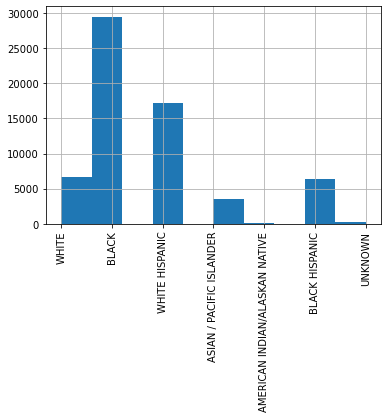

In [134]:
util_col_df["perp_race"].hist(xrot = 90)

<AxesSubplot:>

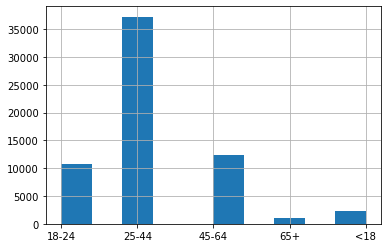

In [135]:
## // todo: Deixar a ordem bonitinha aq embaixo
util_col_df["age_group"].sort_values().hist(xrot = 0)

#### Transform data

In [136]:
crimes_pre_explode = util_col_df["pd_desc"].to_numpy()
all_crimes = np.concatenate(crimes_pre_explode)
all_crimes, np.unique(all_crimes).shape

(array(['TRESPASS 1', 'CRIMINAL', 'TRAFFIC', ..., 'STRANGULATION 1ST',
        'ASSAULT 2', 'UNCLASSIFIED'], dtype='<U52'),
 (198,))

In [137]:
def aggregate_columns(row):
    return [row["age_group"], row["perp_race"], row["law_cat_cd"], row["perp_sex"], row["arrest_date"]] + row["pd_desc"]

util_col_df["items"] = util_col_df.apply(aggregate_columns, axis=1)

uniques_bureaus = np.unique(util_col_df["arrest_boro"])
final_dfs = {}
for bureau_name in uniques_bureaus:
    tmp_df = util_col_df[util_col_df["arrest_boro"] == bureau_name]
    #
    tmp_df = tmp_df[["ARREST_KEY", "items"]]
    #
    final_dfs[bureau_name] = tmp_df

final_dfs

{'B':        arrest_key                                              items
 12      283724613  [18-24, BLACK, Felony, Female, March, CRIMINAL...
 14      283729927  [45-64, BLACK, Felony, Male, March, ROBBERY, O...
 17      283545712  [25-44, BLACK, Misdemeanor, Male, March, FORGE...
 31      283763475  [45-64, BLACK, Felony, Male, March, AGGRAVATED...
 50      283956347  [25-44, WHITE HISPANIC, Misdemeanor, Male, Mar...
 ...           ...                                                ...
 63597   279786329  [45-64, WHITE HISPANIC, Misdemeanor, Male, Jan...
 63600   280805057  [25-44, WHITE HISPANIC, Misdemeanor, Male, Jan...
 63604   281297202  [25-44, BLACK, Misdemeanor, Female, January, L...
 63608   281488926  [25-44, BLACK, Misdemeanor, Male, February, LA...
 63620   280429775  [45-64, BLACK, Felony, Male, January, ASSAULT ...
 
 [14219 rows x 2 columns],
 'K':        arrest_key                                              items
 1       283013910  [25-44, BLACK, Misdemeanor, Fem

In [138]:
ages = util_col_df["age_group"].unique()
races = util_col_df["perp_race"].unique()
offenses = util_col_df["law_cat_cd"].unique()
sexes = util_col_df["perp_sex"].unique()
dates = util_col_df["arrest_date"].unique()
unique_crimes = np.unique(all_crimes)

AGES_LEN = len(ages)
ETNICS_LEN = len(races)
OFFENSES_LEN = len(offenses)
SEXES_LEN = len(sexes)
DATES_LEN = len(dates)
CRIMES_LEN = unique_crimes.shape[0]

final_map = {}
size = 1

for i in range(AGES_LEN):
    final_map[ages[i]] = size
    size += 1

for i in range(ETNICS_LEN):
    final_map[races[i]] = size
    size += 1
    
for i in range(OFFENSES_LEN):
    final_map[offenses[i]] = size
    size += 1

for i in range(SEXES_LEN):
    final_map[sexes[i]] = size
    size += 1

for i in range(DATES_LEN):
    final_map[dates[i]] = size
    size += 1
    
for i in range(CRIMES_LEN):
    final_map[unique_crimes[i]] = size
    size += 1

In [139]:
final_map

{'25-44': 1,
 '45-64': 2,
 '18-24': 3,
 '<18': 4,
 '65+': 5,
 'WHITE': 6,
 'BLACK': 7,
 'WHITE HISPANIC': 8,
 'ASIAN / PACIFIC ISLANDER': 9,
 'AMERICAN INDIAN/ALASKAN NATIVE': 10,
 'BLACK HISPANIC': 11,
 'UNKNOWN': 210,
 'Misdemeanor': 13,
 'Felony': 14,
 'Violation': 15,
 'Male': 16,
 'Female': 17,
 'March': 18,
 'February': 19,
 'January': 20,
 'A.B.C.': 21,
 'ACCOSTING': 22,
 'ADM.CODE': 23,
 'AGGRAVATED': 24,
 'AGGRAVATED CRIMINAL CONTEMPT': 25,
 'AGGRAVATED GRAND LARCENY OF ATM': 26,
 'AGGRAVATED HARASSMENT 1': 27,
 'AGGRAVATED SEXUAL ASBUSE': 28,
 'AGRICULTURE & MARKETS LAW': 29,
 'ALCOHOL': 30,
 'ALCOHOLIC BEVERAGE CONTROL': 31,
 'ALCOHOLIC BEVERAGE CONTROL LAW': 32,
 'ALCOHOLIC BEVERAGES': 33,
 'ARSON 2': 34,
 'ASSAULT 2': 35,
 'ASSAULT 3': 36,
 'ASSAULT POLICE/PEACE OFFICER': 37,
 'ASSEMBLY': 38,
 'BAD': 39,
 'BAIL JUMPING 3': 40,
 'BOOKMAKIN': 41,
 'BRIBERY': 42,
 'BURGLARS TOOLS': 43,
 'BURGLARY': 44,
 'BY FIRE': 45,
 'CANNABIS POSSESSION': 46,
 'CANNABIS SALE': 47,
 'CAR JA

### Formato de entrada

In [140]:
OUTPUT_PATH = "./out"
FILE_NAME = "crimes"

In [141]:
import subprocess

for bureau, df in final_dfs.items():
    casted_file = f"{OUTPUT_PATH}/{FILE_NAME}_{bureau}.txt"
    with open(casted_file, 'w') as file:
        file.write("@CONVERTED_FROM_TEXT\n")
        # Header
        for (key, item) in final_map.items():
            file.write(f"@ITEM={item}={key},\n")
        # Sequences
        for row in df.itertuples():
            casted_items = map(lambda x: str(final_map[x]), row.items)
            file.write(f"{' '.join(casted_items)}\n")
    
        subprocess.run(["java", "-jar", "./HighUtilityItemsetMining/spmf.jar", "run", "FPGrowth_itemsets", f"{casted_file}",  f"{OUTPUT_PATH}/output_{bureau}.txt","20%"])

>/home/vinicius/UFMG/8p/AD/TP/HighUtilityItemsetMining/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 13810
 Max memory usage: 15.730216979980469 mb 
 Frequent itemsets count : 28
 Total time ~ 155 ms
Post-processing to show result in terms of string values.
Post-processing completed.
>/home/vinicius/UFMG/8p/AD/TP/HighUtilityItemsetMining/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 17201
 Max memory usage: 20.50116729736328 mb 
 Frequent itemsets count : 31
 Total time ~ 188 ms
Post-processing to show result in terms of string values.
Post-processing completed.
>/home/vinicius/UFMG/8p/AD/TP/HighUtilityItemsetMining/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 15168
 Max memory usage: 17.970687866210938 mb 
 Frequent itemsets count : 30
 Total time ~ 130 ms
Post-processing to show result in terms of string values.
Post-processing comp

## Rodando